<a href="https://colab.research.google.com/github/ShlokArora2709/Mentorness_Internship/blob/main/Mentorness_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Copy of FastagFraudDetection.csv')
data

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4451 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         4451 non-null   int64 
 1   Timestamp              4451 non-null   object
 2   Vehicle_Type           4451 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            4451 non-null   object
 5   Lane_Type              4451 non-null   object
 6   Vehicle_Dimensions     4451 non-null   object
 7   Transaction_Amount     4451 non-null   int64 
 8   Amount_paid            4451 non-null   int64 
 9   Geographical_Location  4451 non-null   object
 10  Vehicle_Speed          4451 non-null   int64 
 11  Vehicle_Plate_Number   4451 non-null   object
 12  Fraud_indicator        4451 non-null   object
dtypes: int64(4), object(9)
memory usage: 486.8+ KB


In [ ]:
data.nunique()

Transaction_ID           4451
Timestamp                4008
Vehicle_Type                7
FastagID                 4451
TollBoothID                 4
Lane_Type                   2
Vehicle_Dimensions          3
Transaction_Amount         20
Amount_paid                23
Geographical_Location       5
Vehicle_Speed              85
Vehicle_Plate_Number     4451
Fraud_indicator             2
dtype: int64

In [ ]:
columns_to_encode = ['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Geographical_Location', 'Fraud_indicator']
label_encoders = {}

for column in columns_to_encode:

    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])
    label_encoders[column] = label_encoder
data

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,0,FTG-001-ABC-121,0,0,0,350,120,3,65,KA11AB1234,0
1,2,1/7/2023 14:55,1,FTG-002-XYZ-451,1,1,2,120,100,3,78,KA66CD5678,0
3,4,1/9/2023 2:05,5,FTG-044-LMN-322,2,1,0,350,120,3,92,KA11GH3456,0
4,5,1/10/2023 6:35,6,FTG-505-DEF-652,1,0,1,140,100,3,60,KA44IJ6789,0
5,6,1/11/2023 10:00,4,FTG-066-GHI-987,0,1,1,160,100,3,105,KA77KL0123,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,5,FTG-445-EDC-765,2,1,0,330,330,4,81,KA74ST0123,1
4996,4997,1/17/2023 13:43,6,FTG-446-LMK-432,1,0,1,125,125,4,64,KA38UV3456,1
4997,4998,2/5/2023 5:08,4,FTG-447-PLN-109,0,1,1,115,115,4,93,KA33WX6789,1
4998,4999,2/20/2023 20:34,3,FTG-458-VFR-876,1,0,0,145,145,4,57,KA35YZ0123,1


In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,2023-01-06 11:20:00,0,FTG-001-ABC-121,0,0,0,350,120,3,65,KA11AB1234,0
1,2,2023-01-07 14:55:00,1,FTG-002-XYZ-451,1,1,2,120,100,3,78,KA66CD5678,0
3,4,2023-01-09 02:05:00,5,FTG-044-LMN-322,2,1,0,350,120,3,92,KA11GH3456,0
4,5,2023-01-10 06:35:00,6,FTG-505-DEF-652,1,0,1,140,100,3,60,KA44IJ6789,0
5,6,2023-01-11 10:00:00,4,FTG-066-GHI-987,0,1,1,160,100,3,105,KA77KL0123,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,2023-01-01 22:18:00,5,FTG-445-EDC-765,2,1,0,330,330,4,81,KA74ST0123,1
4996,4997,2023-01-17 13:43:00,6,FTG-446-LMK-432,1,0,1,125,125,4,64,KA38UV3456,1
4997,4998,2023-02-05 05:08:00,4,FTG-447-PLN-109,0,1,1,115,115,4,93,KA33WX6789,1
4998,4999,2023-02-20 20:34:00,3,FTG-458-VFR-876,1,0,0,145,145,4,57,KA35YZ0123,1


In [ ]:
data.drop(['Timestamp'],inplace=True,axis=1)
data

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator
0,0,0,0,0,350,120,3,65,0
1,1,1,1,2,120,100,3,78,0
3,5,2,1,0,350,120,3,92,0
4,6,1,0,1,140,100,3,60,0
5,4,0,1,1,160,100,3,105,0
...,...,...,...,...,...,...,...,...,...
4995,5,2,1,0,330,330,4,81,1
4996,6,1,0,1,125,125,4,64,1
4997,4,0,1,1,115,115,4,93,1
4998,3,1,0,0,145,145,4,57,1


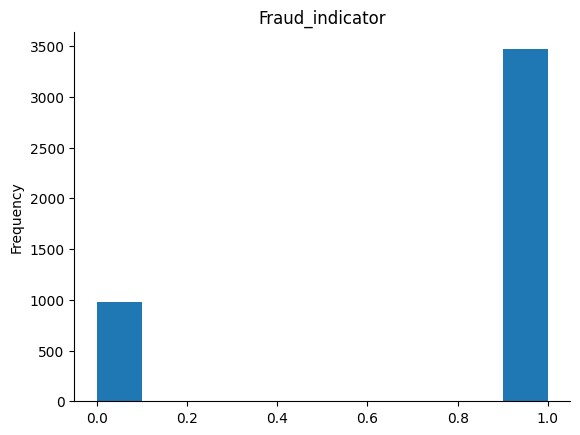

In [ ]:

data['Fraud_indicator'].plot(kind='hist', title='Fraud_indicator')
plt.gca().spines[['top', 'right',]].set_visible(False)

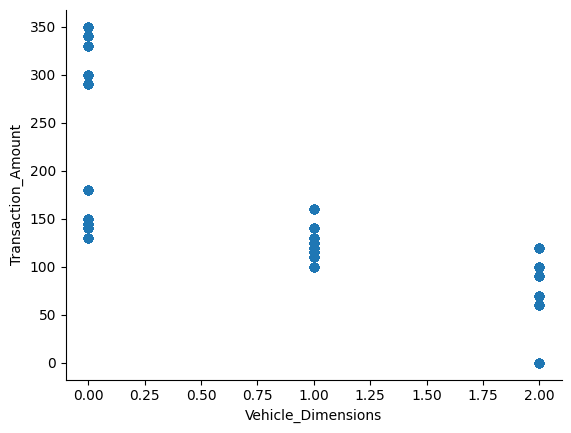

In [ ]:
data.plot(kind='scatter', x='Vehicle_Dimensions', y='Transaction_Amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

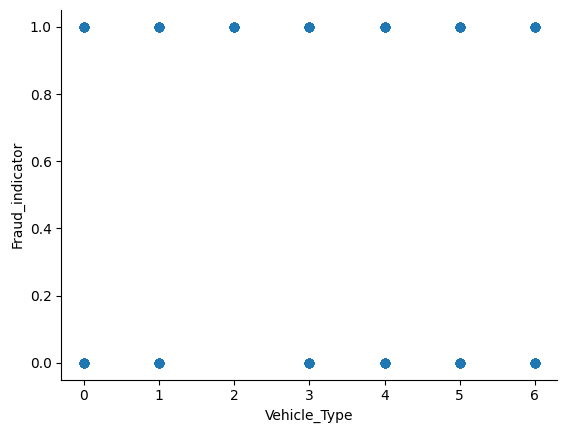

In [ ]:
data.plot(kind='scatter', x='Vehicle_Type', y='Fraud_indicator', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

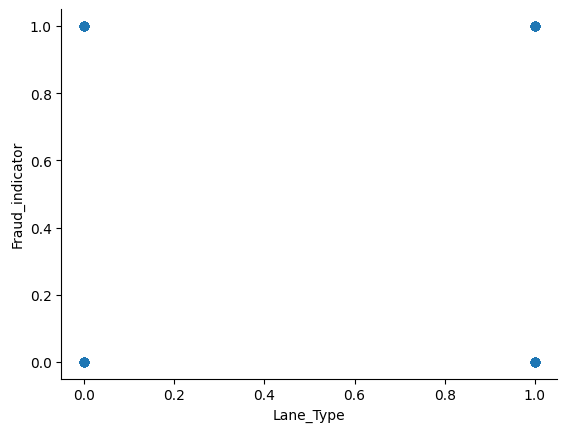

In [ ]:
data.plot(kind='scatter', x='Lane_Type', y='Fraud_indicator', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data

,Timestamp,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator
0,2023-01-06 11:20:00,0,0,0,0,350,120,3,65,0
1,2023-01-07 14:55:00,1,1,1,2,120,100,3,78,0
3,2023-01-09 02:05:00,5,2,1,0,350,120,3,92,0
4,2023-01-10 06:35:00,6,1,0,1,140,100,3,60,0
5,2023-01-11 10:00:00,4,0,1,1,160,100,3,105,0
...,...,...,...,...,...,...,...,...,...,...
4995,2023-01-01 22:18:00,5,2,1,0,330,330,4,81,1
4996,2023-01-17 13:43:00,6,1,0,1,125,125,4,64,1
4997,2023-02-05 05:08:00,4,0,1,1,115,115,4,93,1
4998,2023-02-20 20:34:00,3,1,0,0,145,145,4,57,1


In [ ]:
'''fraud=data[[data['Fraud_indicator']==0]]
not_fraud=data[[data['Fraud_indicatorr']==1]]

F_train, F_test, Fy_train, Fy_test = train_test_split(fraud.drop(['Fraud_indicator']), fraud.Fraud_indicator, test_size=0.15, random_state=42)
N_train, N_test, Ny_train, Ny_test = train_test_split(not_fraud.drop(['Fraud_indicator']), not_fraud.Fraud_indicator, test_size=0.5, random_state=42)

X_Train = pd.concat([F_train, N_train], ignore_index=True)
X_Test = pd.concat([F_test, N_test], ignore_index=True)
Y_Train = pd.concat([Fy_train, Ny_train], ignore_index=True)
Y_Test = pd.concat([Fy_test, Ny_test], ignore_index=True)
X_train, X_test, Y_train, Y_test
'''

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Fraud_indicator'],axis=1), data.Fraud_indicator, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(      Vehicle_Type  TollBoothID  Lane_Type  Vehicle_Dimensions  \
 4806             5            2          0                   0   
 4783             1            0          1                   2   
 1363             4            0          1                   1   
 412              3            1          0                   0   
 886              6            1          0                   1   
 ...            ...          ...        ...                 ...   
 4971             0            2          1                   0   
 544              4            0          0                   1   
 3415             4            0          1                   1   
 4208             0            2          0                   0   
 1000             3            1          0                   0   
 
       Transaction_Amount  Amount_paid  Geographical_Location  Vehicle_Speed  
 4806                 330          330                      4             52  
 4783                  90           

In [ ]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100, 150],
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [0.1, 0.5, 1, 5, 10, 30]
        }
    },
    'k_neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 10, 15],
            'weights': ['uniform', 'distance']
        }
    },
    'naive_bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'xgboost': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [50, 100, 150, 200],
            'max_depth': [3, 6, 9],
            'learning_rate': [0.05, 0.1, 0.3]
        }
    },
    'lightgbm': {
        'model': lgb.LGBMClassifier(),
        'params': {
            'n_estimators': [50, 100, 150, 200],
            'max_depth': [3, 6, 12],
            'learning_rate': [0.05, 0.1, 0.3]
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clfr =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clfr.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clfr.best_score_,
        'best_params': clfr.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [ ]:
df

,model,best_score,best_params
0,random_forest,0.996910,"{'max_depth': None, 'min_samples_split': 2, 'n..."
1,logistic_regression,0.983989,{'C': 0.1}
2,k_neighbors,0.994944,"{'n_neighbors': 3, 'weights': 'distance'}"
3,naive_bayes,0.862360,{}
4,xgboost,0.996910,"{'learning_rate': 0.3, 'max_depth': 3, 'n_esti..."
5,lightgbm,0.998034,"{'learning_rate': 0.1, 'max_depth': 12, 'n_est..."


In [ ]:
df[df['model']=='lightgbm']['best_params']

5    {'learning_rate': 0.1, 'max_depth': 12, 'n_est...
Name: best_params, dtype: object